# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

In [ ]:
In pdf form

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [143]:
### my_LR starts here
import numpy as np
from numpy.linalg import inv

def my_error(data,r_n):
    X = data
    Y= data.iloc[:,-1]
    rn = []
    w_list=[]
    error_list=[]
    for r in r_n:
        w = np.dot(inv(np.dot(np.dot(r,X),X.T)),np.dot(X,np.dot(r,Y)))
        error = 1/2*np.sum(np.dot(r,pow((Y-np.dot(w.T,data)),2)))
        w_list.append(w)
        rn.append(r)
        error_list.append(error)
                        
        
    
    return w, error, rn

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd

In [69]:
data = pd.read_csv('./HW2_LR.csv')
data

,a,b,c,d,k,y
0,70.40,611.72,2679.33,-0.116531,0.408765,-9.804385e+05
1,297.79,172.91,8986.70,-0.668901,0.906781,1.343908e+06
2,213.93,423.22,1505.50,-0.573668,0.862750,-6.170783e+05
3,39.25,353.36,8332.22,-0.144505,0.730970,2.070210e+06
4,5.95,-174.07,3210.43,-0.157336,-0.175142,-7.709453e+05
...,...,...,...,...,...,...
9995,92.54,-449.98,9065.32,-0.660264,0.183420,-5.496800e+06
9996,133.07,-136.77,2131.28,-0.889858,0.528366,-4.228519e+05
9997,64.41,532.15,7644.74,-1.902000,1.876023,2.085432e+06
9998,85.26,537.28,5741.49,-0.461147,1.355170,1.063961e+06


In [70]:
### EDA stars here
data.info()

'''
From data.info(), we know that all the data are float64 and there are no null value from this data set.
Therefore, we do not need to convert data type and add value.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   k       10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


'\nFrom data.info(), we know that all the data are float64 and there are no null value from this data set.\nTherefore, we do not need to convert data type and add value.\n'

In [71]:
duplicate = data.duplicated()
print(duplicate.sum())
# There are also no duplicated values

0


<AxesSubplot:>

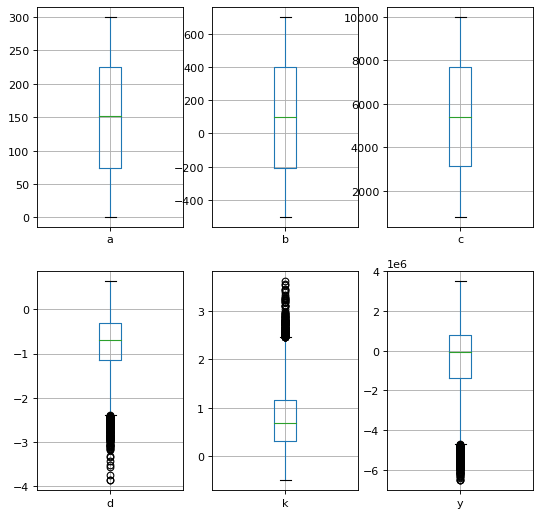

In [72]:

plt.figure(figsize=(8,8),dpi=80)
plt.subplot(231)
data.boxplot(column=["a"])
plt.subplot(232)
data.boxplot(column=["b"])
plt.subplot(233)
data.boxplot(column=["c"])
plt.subplot(234)
data.boxplot(column=["d"])
plt.subplot(235)
data.boxplot(column=["k"])
plt.subplot(236)
data.boxplot(column=["y"])

In [73]:
def remove_outlier(col):  # to remove outlier base on IQR method
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

<AxesSubplot:>

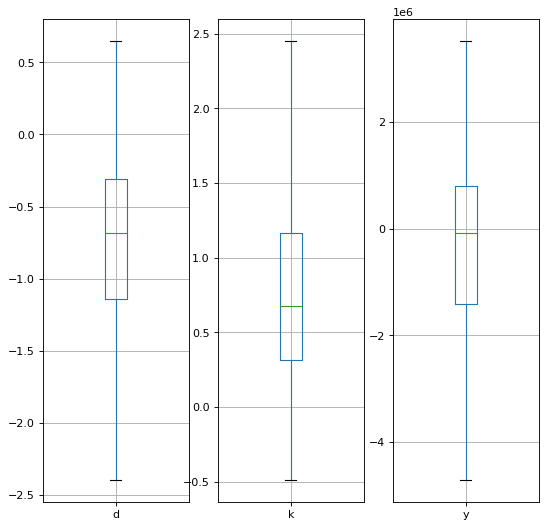

In [74]:
low,upper = remove_outlier(data["d"])
data["d"]=np.where(data["d"]>upper,upper,data["d"])
data["d"]=np.where(data["d"]<low,low,data["d"])

low,upper = remove_outlier(data["k"])
data["k"]=np.where(data["k"]>upper,upper,data["k"])
data["k"]=np.where(data["k"]<low,low,data["k"])

low,upper = remove_outlier(data["y"])
data["y"]=np.where(data["y"]>upper,upper,data["y"])
data["y"]=np.where(data["y"]<low,low,data["y"])
#after remove outlier
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(131)
data.boxplot(column=["d"])
plt.subplot(132)
data.boxplot(column=["k"])
plt.subplot(133)
data.boxplot(column=["y"])

In [131]:
### Pre-processing starts here
# use standardScaler
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()



data["a"] = std_scale.fit_transform(data[["a"]])
data["b"] = std_scale.fit_transform(data[["b"]])
data["c"] = std_scale.fit_transform(data[["c"]])
data["d"] = std_scale.fit_transform(data[["d"]])
data["k"] = std_scale.fit_transform(data[["k"]])
data["y"] = std_scale.fit_transform(data[["y"]])

In [132]:
X =data
X

,a,b,c,d,k,y
0,-0.921915,1.481904,-1.023556,1.094700,-0.610488,-0.346265
1,1.697011,0.215881,1.354235,0.174346,0.200196,0.943370
2,0.731167,0.938058,-1.466073,0.333023,0.128521,-0.144659
3,-1.280680,0.736503,1.107505,1.048090,-0.085994,1.346351
4,-1.664207,-0.785201,-0.823339,1.026711,-1.560989,-0.230031
...,...,...,...,...,...,...
9995,-0.666921,-1.581237,1.383874,0.188737,-0.977311,-2.422132
9996,-0.200124,-0.677586,-1.230163,-0.193809,-0.415798,-0.036895
9997,-0.990904,1.252335,0.848335,-1.880231,1.777957,1.354796
9998,-0.750767,1.267135,0.130836,0.520504,0.930097,0.788045


In [133]:
### Linear Regression Modeling starts here
from sklearn.model_selection import train_test_split
X = data
Y = data[["y"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=3)


LR = LinearRegression()
LR.fit(X_train,Y_train)

Y_predicted = LR.predict(X_test)

rmse = mean_squared_error(Y_test,Y_predicted)

print('Slope:' ,LR.coef_)
print('Intercept:', LR.intercept_)
print('Root mean squared error: ', rmse)



Slope: [[ 1.70905671e-17 -1.73842469e-15  4.52154376e-18 -1.32839783e-16
   2.00823516e-16  1.00000000e+00]]
Intercept: [-2.60208521e-18]
Root mean squared error:  2.543604336954057e-30


In [134]:
np.mean((LR.predict(X_test)-Y_test)**2)

y    2.543604e-30
dtype: float64

In [135]:
LR.score(X_test, Y_test)

1.0

1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

In [144]:
### Visualization starts from here. 
r_n = np.diag([1 for i in range(len(data))])

my_error(data,r_n)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [1]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
data = pd.read_csv("heart.csv")

X = data.drop("output",axis=1)
y= data["output"]
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
### my_LDA starts here 

def my_LDA(X,Y,n_dim):
    clusters = np.unique(Y)#find unique number of label
    if n_dim > len(clusters)-1:
        print("dim number is too larger ")
        
    #within_class scatter matrix
    wm = np.zeros((X.shape[1],X.shape[1]))
    for i in clusters:
        datai = X[Y == i]
        datai = datai-datai.mean(0)
        wmi = np.mat(datai).T*np.mat(datai)
        wm +=  wmi

    #between_class scatter matrix
    bm = np.zeros((X.shape[1],X.shape[1]))
    u = X.mean(0)  #mean of X
    for i in clusters:
        Ni = X[Y == i].shape[0]
        ui = X[Y == i].mean(0)  
        bmi = Ni*np.mat(ui - u).T*np.mat(ui - u)
        bm += bmi
        
    S = np.linalg.inv(wm)*bm  #within matrix times between matrix to finde eigvector
    eigVals,eigVects = np.linalg.eig(S)  #eigvector and eigvalue
    eigValInd = np.argsort(eigVals)
    
    eigValInd = eigValInd[:(-n_dim-1):-1]
    w = eigVects[:,eigValInd]
    data_ndim = np.dot(X, w)
    return data_ndim

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [3]:
### my_Perceptron starts here
def step_func(z):
        return 1.0 if (z > 0) else 0.0
def perceptron(X, y, lr, epochs):
    
    m, n = X.shape #m is number of training examples and n is number of features 
    
    # Initializing parapeters(theta) to zeros.
    theta = np.zeros((n+1,1))
    # Empty list to store how many examples were
    n_miss_list = [] 
    for epoch in range(epochs):
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            x_i = x_i.astype(float) # add to float
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1   
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [4]:
### my_LogisticRegression starts here


class my_LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
        
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
    
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
    
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    
    def fit(self, lr , iterations): # reference idea from internet
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            
            loss = self.loss(sigma,self.y)

            GD = self.gradient_descent(self.x , sigma, self.y)
            self.weight -= lr * GD

    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                
        return y_pred

2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

In [5]:
### EDA stars here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# to check if the target is balance or not
count1=0
count0=0
for i in data["output"]:
    if i==0:
        count0 +=1
    else:
        count1 +=1

print(count1)
print(count0)

165
138


In [7]:
#check if features are skewed or not.

num_feats = data.drop("output",axis=1).dtypes[data.dtypes!='object'].index


skew_feats = data[num_feats].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats})
print(skewness)

              Skew
fbs       1.986652
caa       1.310422
oldpeak   1.269720
chol      1.143401
exng      0.742532
trtbps    0.713768
cp        0.484732
restecg   0.162522
age      -0.202463
thall    -0.476722
slp      -0.508316
thalachh -0.537410
sex      -0.791335


C:\Users\10617\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\10617\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


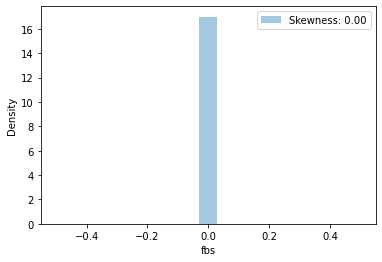

In [8]:
import seaborn as sns
import numpy as np

# Log Transform to remove skewness
Log = data["fbs"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log,label="Skewness: %.2f"%(Log.skew()) )
t.legend()

C:\Users\10617\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


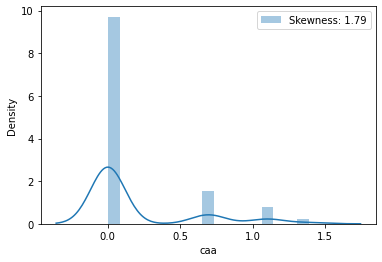

In [9]:
import seaborn as sns
import numpy as np

# Log Transform to remove skewness
Log = data["caa"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log,label="Skewness: %.2f"%(Log.skew()) )
t.legend()

<AxesSubplot:>

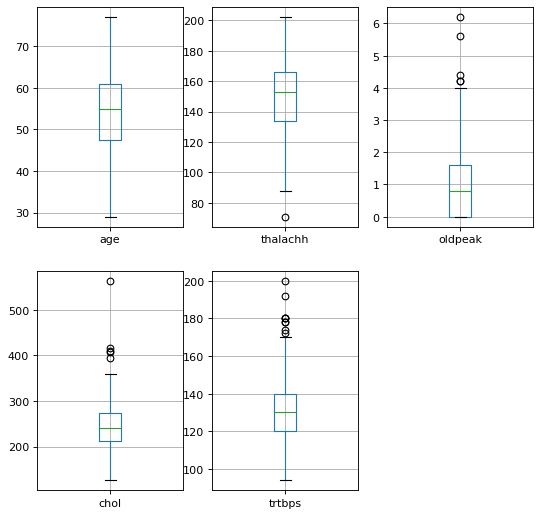

In [10]:
#check outliers.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8),dpi=80)
plt.subplot(231)
data.boxplot(column=["age"])
plt.subplot(232)
data.boxplot(column=["thalachh"])
plt.subplot(233)
data.boxplot(column=["oldpeak"])
plt.subplot(234)
data.boxplot(column=["chol"])
plt.subplot(235)
data.boxplot(column=["trtbps"])


<AxesSubplot:>

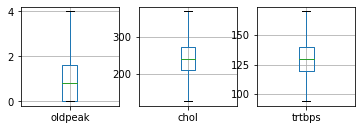

In [11]:
import numpy as np
def remove_outlier(col):  # to remove outlier base on IQR method
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

low,upper = remove_outlier(data["oldpeak"])
data["oldpeak"]=np.where(data["oldpeak"]>upper,upper,data["oldpeak"])
data["oldpeak"]=np.where(data["oldpeak"]<low,low,data["oldpeak"])

low,upper = remove_outlier(data["chol"])
data["chol"]=np.where(data["chol"]>upper,upper,data["chol"])
data["chol"]=np.where(data["chol"]<low,low,data["chol"])

low,upper = remove_outlier(data["trtbps"])
data["trtbps"]=np.where(data["trtbps"]>upper,upper,data["trtbps"])
data["trtbps"]=np.where(data["trtbps"]<low,low,data["trtbps"])
#after remove outliers
plt.subplot(231)
data.boxplot(column=["oldpeak"])
plt.subplot(232)
data.boxplot(column=["chol"])
plt.subplot(233)
data.boxplot(column=["trtbps"])


In [12]:
### Pre-processing starts here

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data.drop("output",axis=1))


array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [15]:
X = data.drop("output",axis=1)
y= data["output"]

### LDA starts here
clf1= LinearDiscriminantAnalysis(n_components=1)
clf1.fit(X,y)
y_pred = clf1.predict(X)
clf1_accuracy = accuracy_score(y,y_pred)
clf1_accuracy


0.8415841584158416

In [16]:
### Perceptron starts here
clf2 = Perceptron()
clf2.fit(X,y)
y_pred = clf2.predict(X)
clf2_accuracy = accuracy_score(y,y_pred)
clf2_accuracy

0.6072607260726073

In [17]:
### Logistic Regression starts here
clf3 = LogisticRegression()
clf3.fit(X,y)
y_pred = clf3.predict(X)
clf3_accuracy = accuracy_score(y,y_pred)
clf3_accuracy

C:\Users\10617\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [18]:
clf4= my_LDA(X,y,1)

clf4_accuracy = accuracy_score(y,y_pred)
clf4_accuracy

0.8547854785478548

In [19]:

data = data.rename({'age': '0', 'sex': '1', 'cp': '2', 'trtbps': '3', 'chol': '4', 'fbs': '5'}, axis='columns')
clf5 = perceptron(X.iloc[:,:6], y, 0.001, 100)
clf5_accuracy = accuracy_score(y,y_pred)
perceptron

ValueError: could not convert string to float: 'age'

In [20]:
clf6= my_LogisticRegression(X,y)
clf6.fit(0.1,4000)
y_pred = clf6.predict(X,0.5)

clf6_accuracy = accuracy_score(y,y_pred)

C:\Users\10617\AppData\Local\Temp/ipykernel_16052/1847752918.py:22: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
C:\Users\10617\AppData\Local\Temp/ipykernel_16052/1847752918.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [21]:
clf6_accuracy

0.6105610561056105

In [30]:
result_table = pd.DataFrame({'Model':['clf1','clf2','clf3','clf4','clf6'],
                             'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,clf4_accuracy,clf6_accuracy]})
result_table

,Model,Accuracy
0,clf1,0.841584
1,clf2,0.607261
2,clf3,0.854785
3,clf4,0.854785
4,clf6,0.610561
